# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

**Импорт библиотек**

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error,make_scorer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

### Ознакомление с данными

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

**Тренировочный набор**

In [3]:
data_train.shape

(14149, 87)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
pd.options.display.max_rows
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [6]:
data_train.duplicated().sum()

0

**Тестовый набор**

In [7]:
data_test.shape

(5290, 53)

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [10]:
data_test.duplicated().sum()

0

**Полный набор**

In [11]:
data_full.shape

(19439, 87)

In [12]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [13]:
data_full.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [14]:
data_full.duplicated().sum()

0

###  Проверка, что эффективность обогащения рассчитана правильно

**доля золота в концентрате после флотации/очистки (С)**

In [15]:
c = data_train['rougher.output.concentrate_au']

**доля золота в сырье/концентрате до флотации/очистки (F)**

In [16]:
f = data_train['rougher.input.feed_au']

**доля золота в отвальных хвостах после флотации/очистки (T)**

In [17]:
t = data_train['rougher.output.tail_au']

**расчёт эффективности**

In [18]:
recovery = ((c*(f-t))/(f*(c-t)))*100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

**Проверка на аномальные значения**

In [19]:
print(recovery.min())
print(recovery.max())

-0.0
100.0


In [20]:
print(data_train['rougher.output.recovery'].min())
print(data_train['rougher.output.recovery'].max())

0.0
100.0


**Сравнение значений**

In [21]:
print((data_train['rougher.output.recovery'] == recovery).sum())
print((data_train['rougher.output.recovery'] != recovery).sum())

6712
7437


**Подсчёт средней абсолютной ошибки (МАЕ)**

In [22]:
mean_absolute_error(data_train['rougher.output.recovery'],recovery)

9.73512347450521e-15

**Вывод:** После проверки расчёта эффективности обогащения, сравнения значений и подсчёта МАЕ можно сделать вывод о наличии незначительных ошибок в тренировочных данных.

###  Анализ признаков, недоступных в тестовой выборке.

In [23]:
features_in_test = data_test.columns.values
features_in_test

array(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate',
       'rougher.state.floatbank10_a_air',
       'rougher.state.floatban

In [24]:
not_in_test = data_train.drop(features_in_test, axis=1)

In [25]:
not_in_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                                14149 non-null  float64


**Вывод:** в тестовой выборке отсутсвуют признаки с параметром output(значений на выходе после операции) и calculation(расчётных характеристик).

### Предобработка данных.

**Признаки идут по порядку,согласно дате и времени проведения манипуляций. Заполним пропуски используя forward fill**

In [26]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

**Изменим значения в столбце date**

In [27]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y.%m.%d %H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y.%m.%d %H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y.%m.%d %H:%M:%S')

## Анализ данных

### Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

**Как меняется концентраци золота**

In [28]:
au_conc = data_full[['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
au_conc = au_conc.rename(columns={'rougher.output.concentrate_au' : 'После флотации',
                        'primary_cleaner.output.concentrate_au': 'После первичной обработки',
                        'final.output.concentrate_au' : 'После финальной обработки'})

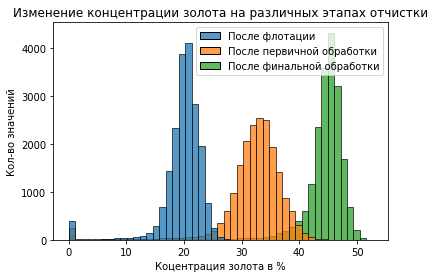

In [29]:
sns.histplot(data=au_conc);
sns.set(rc={'figure.figsize':(15,10)});
plt.title('Изменение концентрации золота на различных этапах отчистки')
plt.xlabel('Коцентрация золота в %');
plt.ylabel('Кол-во значений');

**Как меняется концентрация серебра**

In [30]:
ag_conc = data_full[['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
ag_conc = ag_conc.rename(columns={'rougher.output.concentrate_ag' : 'После флотации',
                        'primary_cleaner.output.concentrate_ag': 'После первичной обработки',
                        'final.output.concentrate_ag' : 'После финальной обработки'})

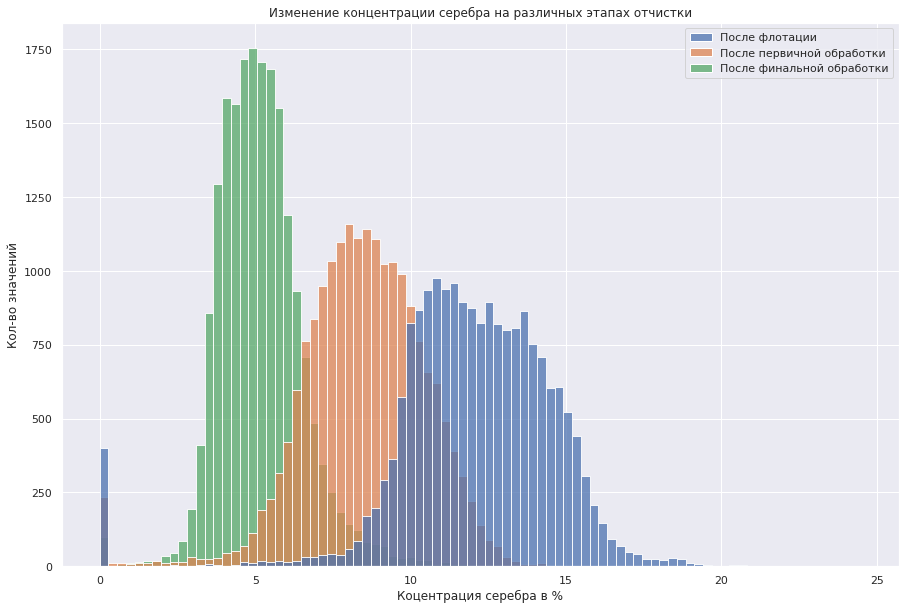

In [31]:
sns.histplot(data=ag_conc);
sns.set(rc={'figure.figsize':(15,10)});
plt.title('Изменение концентрации серебра на различных этапах отчистки')
plt.xlabel('Коцентрация серебра в %');
plt.ylabel('Кол-во значений');

**Как меняется концентрация свинца**

In [32]:
pb_conc = data_full[['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
pb_conc = pb_conc.rename(columns={'rougher.output.concentrate_pb' : 'После флотации',
                        'primary_cleaner.output.concentrate_pb': 'После первичной обработки',
                        'final.output.concentrate_pb' : 'После финальной обработки'})

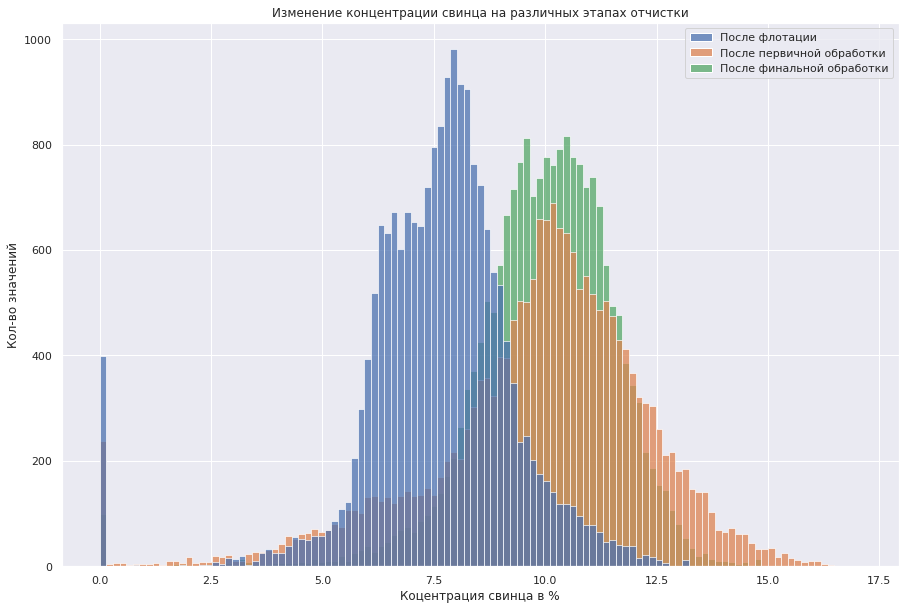

In [33]:
sns.histplot(data=pb_conc);
sns.set(rc={'figure.figsize':(15,10)});
plt.title('Изменение концентрации свинца на различных этапах отчистки')
plt.xlabel('Коцентрация свинца в %');
plt.ylabel('Кол-во значений');

**Вывод:** конценрация золота и серебра постепенно увеличивается после каждого этапа очистки, в то время как есть вероятность включения свинца в сырье после финальной очистки.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

In [34]:
data_train['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [35]:
data_test['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [36]:
feed_size = pd.concat([data_train['rougher.input.feed_size'],
                data_test['rougher.input.feed_size']],
               axis=1, keys=['Тенировочный сет', 'Тестовый сет'])

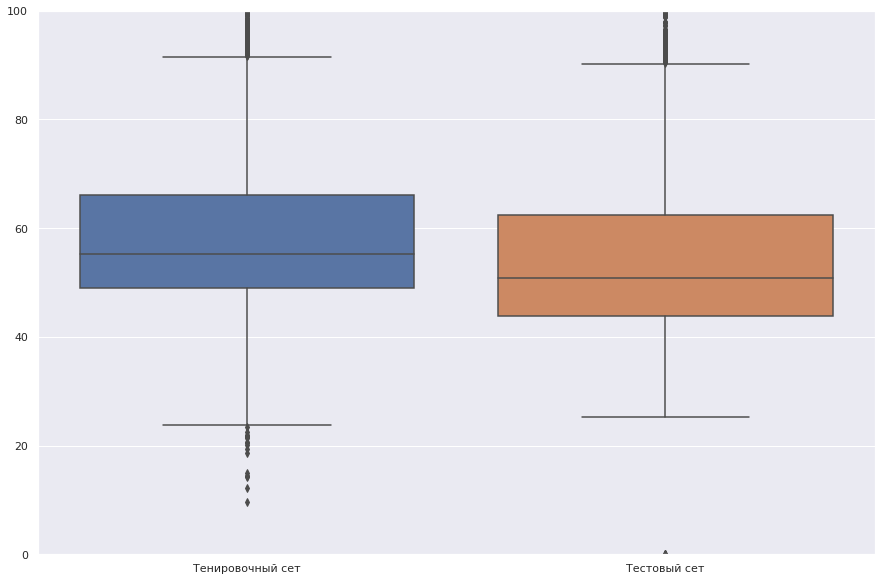

In [37]:
sns.boxplot(data=feed_size);
plt.ylim(0, 100);

**Вывод:** после рассмотрения размеров гранул сырья видно, что значения в тренировочном и тестовых наборах данных распределены примерно одинаково.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [38]:
rougher_input = data_full['rougher.input.feed_ag']+\
data_full['rougher.input.feed_pb']+\
data_full['rougher.input.feed_sol']+\
data_full['rougher.input.feed_au']

In [39]:
rougher_output = data_full['rougher.output.concentrate_ag']+\
data_full['rougher.output.concentrate_pb']+\
data_full['rougher.output.concentrate_sol']+\
data_full['rougher.output.concentrate_au']

In [40]:
# primary_output = data_full['primary_cleaner.output.concentrate_ag']+\
# data_full['primary_cleaner.output.concentrate_pb']+\
# data_full['primary_cleaner.output.concentrate_sol']+\
# data_full['primary_cleaner.output.concentrate_au']

In [41]:
final_output = data_full['final.output.concentrate_ag']+\
data_full['final.output.concentrate_pb']+\
data_full['final.output.concentrate_sol']+\
data_full['final.output.concentrate_au']

In [42]:
cleaning_stage = pd.concat([rougher_input,rougher_output,final_output],axis=1,
                           keys=['Сырье', 'Черновой концентрат','Финальный концентрат'])

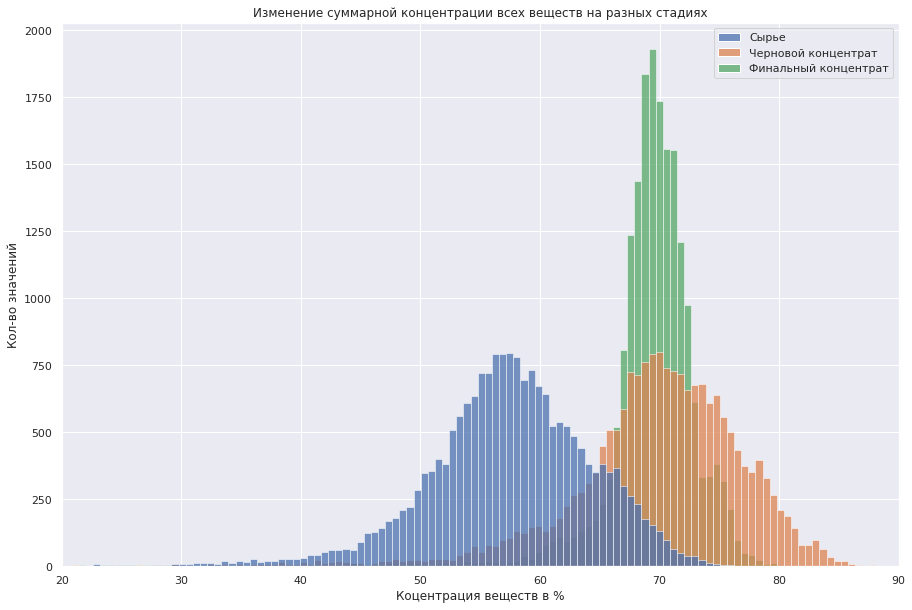

In [43]:
sns.histplot(data=cleaning_stage);
sns.set(rc={'figure.figsize':(15,10)});
plt.title('Изменение суммарной концентрации всех веществ на разных стадиях')
plt.xlabel('Коцентрация веществ в %');
plt.ylabel('Кол-во значений');
plt.xlim(20,90);

In [44]:
cleaning_stage.describe()

,Сырье,Черновой концентрат,Финальный концентрат
count,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,68.653624
std,7.212680,12.491279,7.427536
min,0.040000,0.000000,0.000000
25%,53.557679,66.012495,67.932362
50%,57.594391,70.181495,69.598444
75%,61.953459,74.356904,71.368472
max,76.978947,88.140119,80.210644


**Вывод:** наблюдается резкий рост концентрации веществ на финальной стадии очистки. Также, из полученных данных видно наличие веществ с общей концентрацией менее 50 %. Возможно это из-за солей!

**Создадим переменные с именами колонок**

In [45]:
cols_feed = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']

In [46]:
cols_rougher = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']

In [47]:
cols_final = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']

**Создадим столбцы со значениями суммарной концентрации веществ**

In [48]:
data_full['sum_feed'] = data_full[cols_feed].sum(axis=1)

In [49]:
data_full['sum_rougher'] = data_full[cols_rougher].sum(axis=1)

In [50]:
data_full['sum_final'] = data_full[cols_final].sum(axis=1)

**Исходя из графика роста концентрации вещест видно, что более значительный рост начинается с 30%. Исключим все значения ниже этого порога.**

In [51]:
data_full = data_full[(data_full['sum_feed']>30)&(data_full['sum_rougher']>30)&(data_full['sum_final']>30)]
data_full.shape

(18768, 90)

**Повторно рассмотрим описание показателей**

In [52]:
data_full[['sum_feed','sum_rougher','sum_final']].describe()

,sum_feed,sum_rougher,sum_final
count,18768.000000,18768.000000,18768.000000
mean,57.522664,69.760037,69.276018
std,6.715937,7.214944,4.305135
min,30.017784,30.037199,30.197439
25%,53.623264,66.405575,67.979639
50%,57.651367,70.349850,69.627599
75%,62.013732,74.461807,71.393471
max,76.978947,88.140119,80.210644


## Модель

### Напишем функцию для вычисления итоговой sMAPE

**Эта функция станет кастомной для параметра scoring в дальнейших моделях**

In [53]:
def sMAPE(target,prediction):
    smape = (1/len(target)*np.sum(abs(target-prediction)/((abs(target)+abs(prediction))/2)))*100
    return smape

In [54]:
scorer = make_scorer(sMAPE, greater_is_better = True)

In [55]:
def final_sMAPE(rougher,final):
    final_smape = 0.25*rougher+0.75*final
    return final_smape

### Обучим разные модели и оценим их качество кросс-валидацией. 

**Доп подготовка данных**

In [56]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [57]:
data_train = data_train.drop(columns=set(data_train.columns)-set(data_test.columns), axis=1)

**Подготовка признаков(тренировочных)**

In [58]:
features_train = data_train.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target_train=np.array(data_train[['rougher.output.recovery','final.output.recovery']])

**Подготовка признаков(тестовых)**

In [59]:
features_test = data_test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)
target_test = np.array(data_test[['rougher.output.recovery','final.output.recovery']])

**Модель линейной регрессии**

In [60]:
model_lr = LinearRegression()
np.mean(cross_val_score(model_lr, features_train, target_train, cv=10, scoring=scorer))

22.969132059671757

**Модель дерева решений в регрессии**

In [61]:
state = RandomState(123)

In [62]:
%%time
best_model = None
best_result = 100
for depth in range(1,10,1):
    model_dtr = DecisionTreeRegressor(random_state=state, max_depth=depth)
    result = np.mean(cross_val_score(model_dtr,features_train,target_train,cv=10,scoring=scorer))
    if result < best_result:
        best_model=model_dtr
        best_result=result
print('Лучшая модель:', str(best_model))
print('Лучшая КВ:', best_result)
print()

Лучшая модель: DecisionTreeRegressor(max_depth=2,
                      random_state=RandomState(MT19937) at 0x7F0A8CFCCC40)
Лучшая КВ: 22.65625916060639

CPU times: user 30.4 s, sys: 26.5 ms, total: 30.5 s
Wall time: 30.5 s


**Модель случайного леса в регрессии**

In [63]:
# %%time
# model_rfr = RandomForestRegressor(n_estimators=81, max_depth=9, random_state=state)
# np.mean(cross_val_score(model_rfr,features_train,target_train,cv=10,scoring=scorer))

**Вывод:** у модели случайного леса в регрессии лучший показатель

### Проверяем качество модели на тестовой выборке

In [64]:
%%time
model_rfr = RandomForestRegressor(n_estimators=81, max_depth=9, random_state=state)
np.mean(cross_val_score(model_rfr,features_test,target_test,cv=10,scoring=scorer))

CPU times: user 1min 33s, sys: 86 ms, total: 1min 33s
Wall time: 1min 33s


11.44497981549397

**Рассчитаем итоговое sMAPE**

**Целевые признаки для тестовой выборки**

In [65]:
target_test_rougher=np.array(data_test['rougher.output.recovery'])
target_test_final=np.array(data_test['final.output.recovery'])

**Целевые признаки для тренировочной выборки**

In [66]:
target_train_rougher=np.array(data_train['rougher.output.recovery'])
target_train_final=np.array(data_train['final.output.recovery'])

**Применение лучшей модели с отобранными целевыми признаками**

In [67]:
model_rfr = RandomForestRegressor(n_estimators=81, max_depth=9, random_state=state)
model_rfr.fit(features_train,target_train_rougher)
prediction_rougher = model_rfr.predict(features_test)
rougher = sMAPE(target_test_rougher,prediction_rougher)
rougher

7.390069446012509

In [68]:
model_rfr = RandomForestRegressor(n_estimators=81, max_depth=9, random_state=state)
model_rfr.fit(features_train,target_train_final)
prediction_final = model_rfr.predict(features_test)
final = sMAPE(target_test_final,prediction_final)
final

8.349077207870529

In [69]:
final_sMAPE(rougher,final)

8.109325267406025

**В качестве стратегии выберем средние значение, так как мы сравниваем со средним значением кросс-валидации**

In [70]:
def dummy_smape(feature,target,feature_test,target_test):
    dummy = DummyRegressor(strategy='mean').fit(feature,target)
    dummy_pred = dummy.predict(feature_test)
    smape = sMAPE(target_test,dummy_pred)
    return smape

In [71]:
rougher = dummy_smape(features_train,target_train_rougher,features_test,target_test_rougher)

In [72]:
final = dummy_smape(features_train,target_train_final,features_test,target_test_final)

In [73]:
final_sMAPE(rougher,final)

8.084419863288065

## Вывод

В процессе исследования выявлен факт увеличения процентного содержания золота и серебра в исходном сырье после прохождения различных стадий его очистки. Концентрация содержания свинца больше всего изменилось после флотации.

Лучшая модель с предсказаниями обогащения чернового и финального концентрата - RandomForestRegressor.
Итоговая sMAPE - 10.3%